In [1]:
import os
import splitfolders
from fastai.vision.all import *
from fastai.data.all import *
from fastai.vision.widgets import *

In [2]:
torch.cuda.set_device(6)


# Skip section

In [ ]:
category_names = os.listdir('/home/alao/ml/swedish_leaf_dataset')
category_names

In [ ]:
input_folder = '/home/alao/ml/swedish_leaf_dataset'

In [ ]:
#split the dataset 80:20
splitfolders.ratio(input_folder, output="swl_data_split", seed=42, ratio=(.8,.2,), group_prefix=None)

# Continue Section

In [3]:
path = '/home/alao/ml/swl_data_split'
path

'/home/alao/ml/swl_data_split'

In [ ]:
fnames = get_image_files(path)
fnames

In [ ]:
im = PILImage.create(fnames[20])
im.show()
im.size

In [ ]:
rsz = Resize(128, method=method)
#     show_image(rsz(img, split_idx=0), ctx=ax, title=method);
rd = rsz(im)
show_image(rd)
rd.size

In [ ]:
Resize??

# Build Datablocks and Train Model

In [4]:

plants = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=GrandparentSplitter(train_name='train', valid_name='val'),
    get_y=parent_label,
    item_tfms=Resize(256))

In [5]:
dls = plants.dataloaders(path, bs=32)

# ResNet 34 Architecture

In [6]:

learn_res34 = cnn_learner(dls, resnet34, metrics=(error_rate, accuracy))
learn_res34.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,2.091880,0.061896,0.008889,0.991111,00:06


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.151065,0.032185,0.008889,0.991111,00:05
1,0.094518,0.038711,0.013333,0.986667,00:05
2,0.055346,0.018978,0.004444,0.995556,00:05
3,0.040610,0.018926,0.004444,0.995556,00:05
4,0.028775,0.022389,0.008889,0.991111,00:05


In [8]:
learn_res34.save('SWL/resnet-34')

Path('models/SWL/resnet-34.pth')

# Evaluate Model

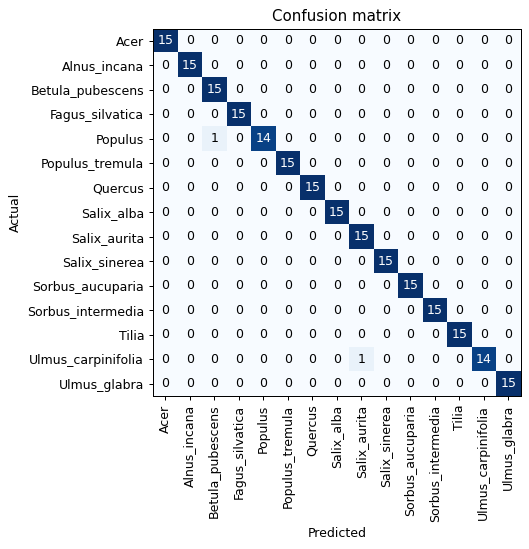

In [9]:

interp_res34 = ClassificationInterpretation.from_learner(learn_res34)
interp_res34.plot_confusion_matrix(dpi = 90,figsize = (6,6))


In [10]:
learn_res34.summary()

Sequential (Input shape: 32 x 3 x 256 x 256)
Layer (type)         Output Shape         Param #    Trainable 
                     32 x 64 x 128 x 128 
Conv2d                                    9408       True      
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     32 x 64 x 64 x 64   
MaxPool2d                                                      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                      

In [ ]:
learn.show_results()

In [ ]:

interp.plot_top_losses(5)

# ResNet 18 Architecture

In [11]:

learn_res18 = cnn_learner(dls, resnet18, metrics=(error_rate, accuracy))
learn_res18.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,2.004931,0.089608,0.017778,0.982222,00:05


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.191993,0.020713,0.004444,0.995556,00:05
1,0.114985,0.015055,0.004444,0.995556,00:06
2,0.067227,0.012071,0.004444,0.995556,00:06
3,0.046106,0.008455,0.004444,0.995556,00:05
4,0.029735,0.006898,0.004444,0.995556,00:05


In [13]:
learn_res18.save('SWL/resnet-18')

Path('models/SWL/resnet-18.pth')

# Evaluate Model

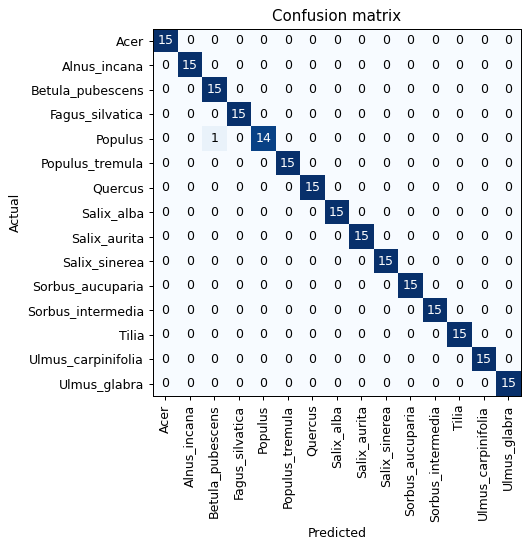

In [14]:

interp_res18 = ClassificationInterpretation.from_learner(learn_res18)
interp_res18.plot_confusion_matrix(dpi = 90,figsize = (6,6))


In [15]:
learn_res18.summary()

Sequential (Input shape: 32 x 3 x 256 x 256)
Layer (type)         Output Shape         Param #    Trainable 
                     32 x 64 x 128 x 128 
Conv2d                                    9408       True      
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     32 x 64 x 64 x 64   
MaxPool2d                                                      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                      

# ResNet 50 Architecture

In [18]:

learn_res50 = cnn_learner(dls, resnet50, metrics=(error_rate, accuracy))
learn_res50.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.124727,0.049902,0.022222,0.977778,00:07


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.092862,0.032461,0.013333,0.986667,00:08
1,0.087962,0.013552,0.008889,0.991111,00:08
2,0.086986,0.002695,0.000000,1.000000,00:08
3,0.060625,0.003591,0.000000,1.000000,00:08
4,0.042421,0.004518,0.000000,1.000000,00:08


In [19]:
learn_res50.save('SWL/resnet-50')

Path('models/SWL/resnet-50.pth')

# Evaluate Model

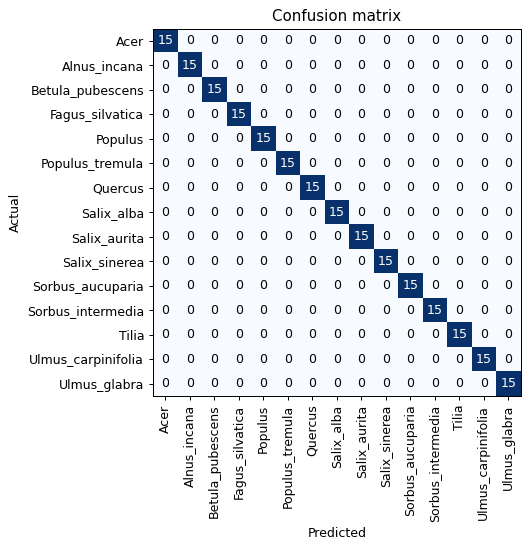

In [20]:

interp_res50 = ClassificationInterpretation.from_learner(learn_res50)
interp_res50.plot_confusion_matrix(dpi = 90,figsize = (6,6))


In [21]:
learn_res50.summary()

Sequential (Input shape: 32 x 3 x 256 x 256)
Layer (type)         Output Shape         Param #    Trainable 
                     32 x 64 x 128 x 128 
Conv2d                                    9408       True      
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     32 x 64 x 64 x 64   
MaxPool2d                                                      
Conv2d                                    4096       True      
BatchNorm2d                               128        True      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
____________________________________________________________________________
                     32 x 256 x 64 x 64  
Conv2d                                    16384      True      
BatchNorm2d                        

# ResNet 101 Architecture

In [22]:

learn_res101 = cnn_learner(dls, resnet101, metrics=(error_rate, accuracy))
learn_res101.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.111180,0.073676,0.026667,0.973333,00:08


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.070495,0.003163,0.000000,1.000000,00:10
1,0.089048,0.034754,0.008889,0.991111,00:10
2,0.080421,0.002690,0.000000,1.000000,00:10
3,0.050496,0.006297,0.004444,0.995556,00:11
4,0.038844,0.008153,0.004444,0.995556,00:11


In [23]:
learn_res101.save('SWL/resnet-101')

Path('models/SWL/resnet-101.pth')

# Evaluate Model

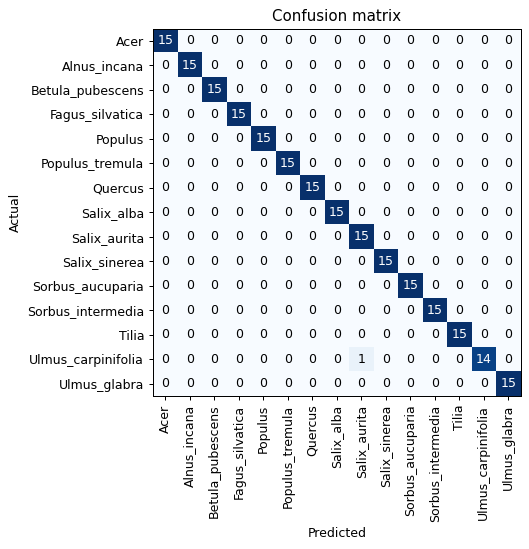

In [24]:

interp_res101 = ClassificationInterpretation.from_learner(learn_res101)
interp_res101.plot_confusion_matrix(dpi = 90,figsize = (6,6))


In [25]:
learn_res101.summary()

Sequential (Input shape: 32 x 3 x 256 x 256)
Layer (type)         Output Shape         Param #    Trainable 
                     32 x 64 x 128 x 128 
Conv2d                                    9408       True      
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     32 x 64 x 64 x 64   
MaxPool2d                                                      
Conv2d                                    4096       True      
BatchNorm2d                               128        True      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
____________________________________________________________________________
                     32 x 256 x 64 x 64  
Conv2d                                    16384      True      
BatchNorm2d                        

# ResNet 152 Architecture

In [26]:

learn_res152 = cnn_learner(dls, resnet152, metrics=(error_rate, accuracy))
learn_res152.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.075026,0.071093,0.017778,0.982222,00:11


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.078198,0.037045,0.008889,0.991111,00:14
1,0.076306,0.053055,0.017778,0.982222,00:14
2,0.094831,0.036520,0.008889,0.991111,00:14
3,0.068785,0.003488,0.000000,1.000000,00:14
4,0.052938,0.001672,0.000000,1.000000,00:14


In [27]:
learn_res152.save('SWL/resnet-152')

Path('models/SWL/resnet-152.pth')

# Evaluate Model

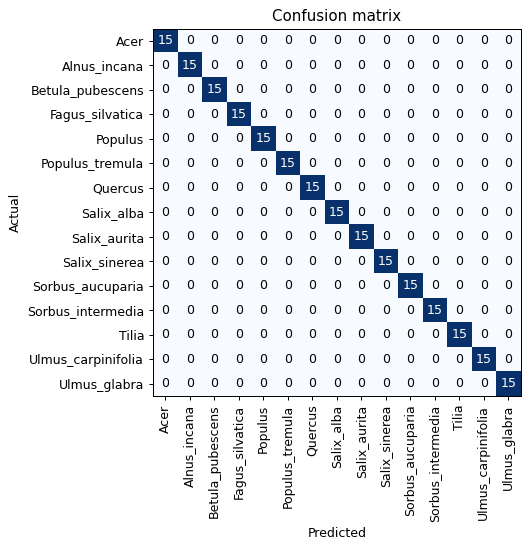

In [28]:

interp_res152 = ClassificationInterpretation.from_learner(learn_res152)
interp_res152.plot_confusion_matrix(dpi = 90,figsize = (6,6))


In [29]:
learn_res152.summary()

Sequential (Input shape: 32 x 3 x 256 x 256)
Layer (type)         Output Shape         Param #    Trainable 
                     32 x 64 x 128 x 128 
Conv2d                                    9408       True      
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     32 x 64 x 64 x 64   
MaxPool2d                                                      
Conv2d                                    4096       True      
BatchNorm2d                               128        True      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
____________________________________________________________________________
                     32 x 256 x 64 x 64  
Conv2d                                    16384      True      
BatchNorm2d                        

# AlexNet Architecture

In [30]:

learn_alex = cnn_learner(dls, alexnet, metrics=(error_rate, accuracy))
learn_alex.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,2.385142,0.167619,0.035556,0.964444,00:06


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.390432,0.072803,0.022222,0.977778,00:06
1,0.257683,0.056628,0.013333,0.986667,00:06
2,0.169400,0.048978,0.017778,0.982222,00:06
3,0.114456,0.025386,0.008889,0.991111,00:06
4,0.099368,0.026931,0.013333,0.986667,00:06


In [31]:
learn_alex.save('SWL/alexnet')

Path('models/SWL/alexnet.pth')

# Evaluate Model

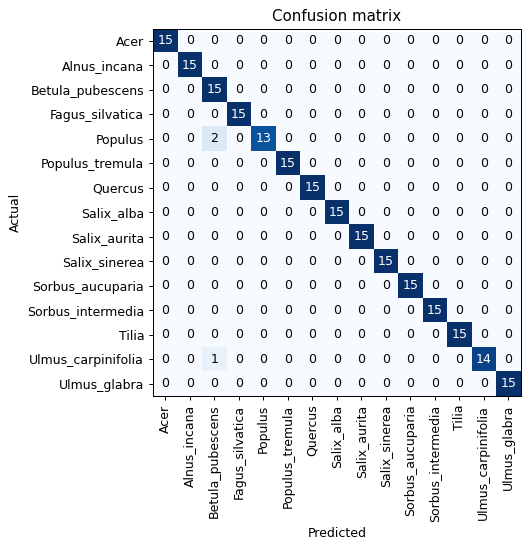

In [32]:

interp_alex = ClassificationInterpretation.from_learner(learn_alex)
interp_alex.plot_confusion_matrix(dpi = 90,figsize = (6,6))


In [33]:
learn_alex.summary()

Sequential (Input shape: 32 x 3 x 256 x 256)
Layer (type)         Output Shape         Param #    Trainable 
                     32 x 64 x 63 x 63   
Conv2d                                    23296      True      
ReLU                                                           
____________________________________________________________________________
                     32 x 64 x 31 x 31   
MaxPool2d                                                      
____________________________________________________________________________
                     32 x 192 x 31 x 31  
Conv2d                                    307392     True      
ReLU                                                           
____________________________________________________________________________
                     32 x 192 x 15 x 15  
MaxPool2d                                                      
____________________________________________________________________________
                     32 x 384 x

# Make prediction

In [ ]:

# hide_output
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
#hide_output
uploader = widgets.FileUpload()
uploader

In [ ]:

img = PILImage.create(uploader.data[0])
is_acer,_,probs = learn.predict(img)
print(f"What is this?: {is_acer}.")
